# Physionet - The impact of weekdays/weekend on Mortality Rate using MIMIC dataset


### importing all the necessary libraries

In [3]:
# Data processing libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# library to ignore warnings
#import warnings
#warnings.filterwarnings('ignore')

In [4]:
# Reading the dataset
data = pd.read_csv("data.csv")

In [5]:
# checking for the different features 
data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'admittime_hospital',
       'dischtime_hospital', 'los_hospital', 'admission_age', 'ethnicity',
       'hospital_expire_flag', 'intime_icu', 'outtime_icu', 'los_icu',
       'first_careunit', 'admission_type', 'icustay_expire_flag', 'oasis',
       'oasis_prob'],
      dtype='object')

# Cleaning the Data

In [6]:
# Checking for Null values 
# only 2 rows have Null values hence dropping those 2 rows
data.isna().sum()

subject_id              0
hadm_id                 0
icustay_id              0
gender                  0
admittime_hospital      0
dischtime_hospital      0
los_hospital            0
admission_age           0
ethnicity               0
hospital_expire_flag    0
intime_icu              0
outtime_icu             2
los_icu                 2
first_careunit          0
admission_type          0
icustay_expire_flag     0
oasis                   0
oasis_prob              0
dtype: int64

In [7]:
# dropping Null values
data.dropna(inplace=True)

In [8]:
# Now there are no Null values
data.isna().sum()

subject_id              0
hadm_id                 0
icustay_id              0
gender                  0
admittime_hospital      0
dischtime_hospital      0
los_hospital            0
admission_age           0
ethnicity               0
hospital_expire_flag    0
intime_icu              0
outtime_icu             0
los_icu                 0
first_careunit          0
admission_type          0
icustay_expire_flag     0
oasis                   0
oasis_prob              0
dtype: int64

In [9]:
# Describing the statics of different features
data.describe()

,subject_id,hadm_id,icustay_id,los_hospital,admission_age,hospital_expire_flag,los_icu,icustay_expire_flag,oasis,oasis_prob
count,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000,38556.000000
mean,38268.529412,150037.503839,250221.873638,9.853641,74.564011,0.114716,3.987395,0.082841,31.226398,0.144302
std,29376.214131,28945.614255,28914.344101,10.705100,55.116288,0.318683,6.018559,0.275645,8.962193,0.143488
min,3.000000,100001.000000,200003.000000,0.000000,16.000000,0.000000,0.000000,0.000000,3.000000,0.003042
25%,13982.500000,124927.250000,225239.750000,4.000000,52.000000,0.000000,1.000000,0.000000,25.000000,0.048012
50%,27913.500000,150095.000000,250278.000000,7.000000,66.000000,0.000000,2.000000,0.000000,31.000000,0.097783
75%,62967.250000,175223.250000,275288.500000,12.000000,78.000000,0.000000,4.000000,0.000000,37.000000,0.188911
max,99999.000000,199999.000000,299999.000000,295.000000,310.000000,1.000000,154.000000,1.000000,70.000000,0.939936


In [10]:
# Checking for the data type of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38556 entries, 0 to 38557
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subject_id            38556 non-null  int64  
 1   hadm_id               38556 non-null  int64  
 2   icustay_id            38556 non-null  int64  
 3   gender                38556 non-null  object 
 4   admittime_hospital    38556 non-null  object 
 5   dischtime_hospital    38556 non-null  object 
 6   los_hospital          38556 non-null  int64  
 7   admission_age         38556 non-null  int64  
 8   ethnicity             38556 non-null  object 
 9   hospital_expire_flag  38556 non-null  int64  
 10  intime_icu            38556 non-null  object 
 11  outtime_icu           38556 non-null  object 
 12  los_icu               38556 non-null  float64
 13  first_careunit        38556 non-null  object 
 14  admission_type        38556 non-null  object 
 15  icustay_expire_flag

# Data Preprocessing

In [11]:
# Converting the string type dates to datetime objects

data['admittime_hospital'] = pd.to_datetime(data['admittime_hospital'])
data['dischtime_hospital'] = pd.to_datetime(data['dischtime_hospital'])
data['intime_icu'] = pd.to_datetime(data['intime_icu'])
data['outtime_icu'] = pd.to_datetime(data['outtime_icu'])

In [12]:
# Converting the datetime features into days of the weeks features 

data['admitday_hospital'] = data.admittime_hospital.dt.dayofweek
data['dischday_hospital'] = data.dischtime_hospital.dt.dayofweek
data['inday_icu'] = data.intime_icu.dt.dayofweek
data['inday_icu_seq'] = data.intime_icu.dt.dayofweek
data['outday_icu'] = data.outtime_icu.dt.dayofweek
data.head()

,subject_id,hadm_id,icustay_id,gender,admittime_hospital,dischtime_hospital,los_hospital,admission_age,ethnicity,hospital_expire_flag,...,first_careunit,admission_type,icustay_expire_flag,oasis,oasis_prob,admitday_hospital,dischday_hospital,inday_icu,inday_icu_seq,outday_icu
0,3,145834,211552,M,2101-10-20 19:08:00,2101-10-31 13:58:00,11,76,WHITE,0,...,MICU,EMERGENCY,0,57,0.748927,3,0,3,3,2
1,6,107064,228232,F,2175-05-30 07:15:00,2175-06-15 16:00:00,16,66,WHITE,0,...,SICU,ELECTIVE,0,11,0.008392,1,3,1,1,5
2,56,181711,275642,F,2104-01-02 02:01:00,2104-01-08 10:30:00,6,300,WHITE,1,...,SICU,EMERGENCY,0,52,0.611922,2,1,2,2,3
3,98,188606,216929,F,2137-04-02 08:00:00,2137-04-09 10:38:00,7,41,WHITE,0,...,SICU,ELECTIVE,0,11,0.008392,1,1,1,1,3
4,136,184644,203947,M,2103-05-09 07:15:00,2103-05-14 11:33:00,5,52,WHITE,0,...,SICU,ELECTIVE,0,8,0.005740,2,0,2,2,3


In [13]:
data['inday_icu'].value_counts()

4    6263
1    6141
0    6096
2    5984
3    5877
5    4235
6    3960
Name: inday_icu, dtype: int64

In [14]:
# creating weekday vs weekend column for icu_intime

data['inday_icu_wkd'] = np.where(data.intime_icu.dt.weekday <= 4, 
                                 'weekday','weekend')
data['inday_icu_wkd'].value_counts()

weekday    30361
weekend     8195
Name: inday_icu_wkd, dtype: int64

In [15]:
data.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'admittime_hospital',
       'dischtime_hospital', 'los_hospital', 'admission_age', 'ethnicity',
       'hospital_expire_flag', 'intime_icu', 'outtime_icu', 'los_icu',
       'first_careunit', 'admission_type', 'icustay_expire_flag', 'oasis',
       'oasis_prob', 'admitday_hospital', 'dischday_hospital', 'inday_icu',
       'inday_icu_seq', 'outday_icu', 'inday_icu_wkd'],
      dtype='object')

# Data Visualization

In [16]:
# Pivot data to summarise by day

dat_dow = data.groupby(['admission_type',
                        'inday_icu_seq'])['hospital_expire_flag'].mean().reset_index()

dat_dow = dat_dow.pivot(index='inday_icu_seq', 
                        columns='admission_type', values='hospital_expire_flag')

dat_dow

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_seq,,,
0,0.020553,0.124413,0.137931
1,0.019350,0.130315,0.082759
2,0.026549,0.127391,0.106383
3,0.027027,0.133137,0.114504
4,0.026575,0.126612,0.093023
5,0.080247,0.137072,0.162896
6,0.089109,0.146971,0.123596


Text(0, 0.5, 'Hospital mortality rate')

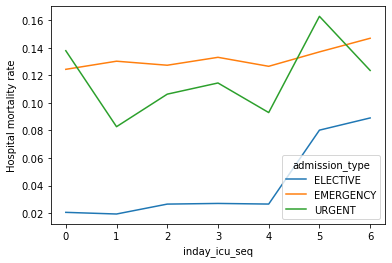

In [17]:
# day_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
ax = dat_dow.plot()
ax.set_ylabel("Hospital mortality rate")

In [18]:
dat_wkd = data.groupby(['admission_type','inday_icu_wkd'])['hospital_expire_flag'].mean().reset_index()
dat_wkd = dat_wkd.pivot(index='inday_icu_wkd', columns='admission_type', values='hospital_expire_flag')
dat_wkd.head()

admission_type,ELECTIVE,EMERGENCY,URGENT
inday_icu_wkd,,,
weekday,0.023732,0.128359,0.107091
weekend,0.083650,0.141909,0.145363


Text(0, 0.5, 'Hospital mortality rate')

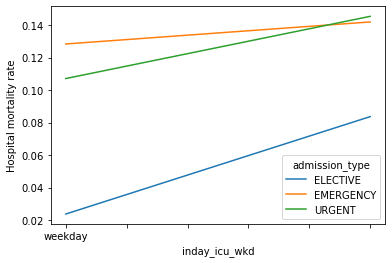

In [19]:
ax = dat_wkd.plot()
ax.set_ylabel("Hospital mortality rate")

(15.5, -0.5)

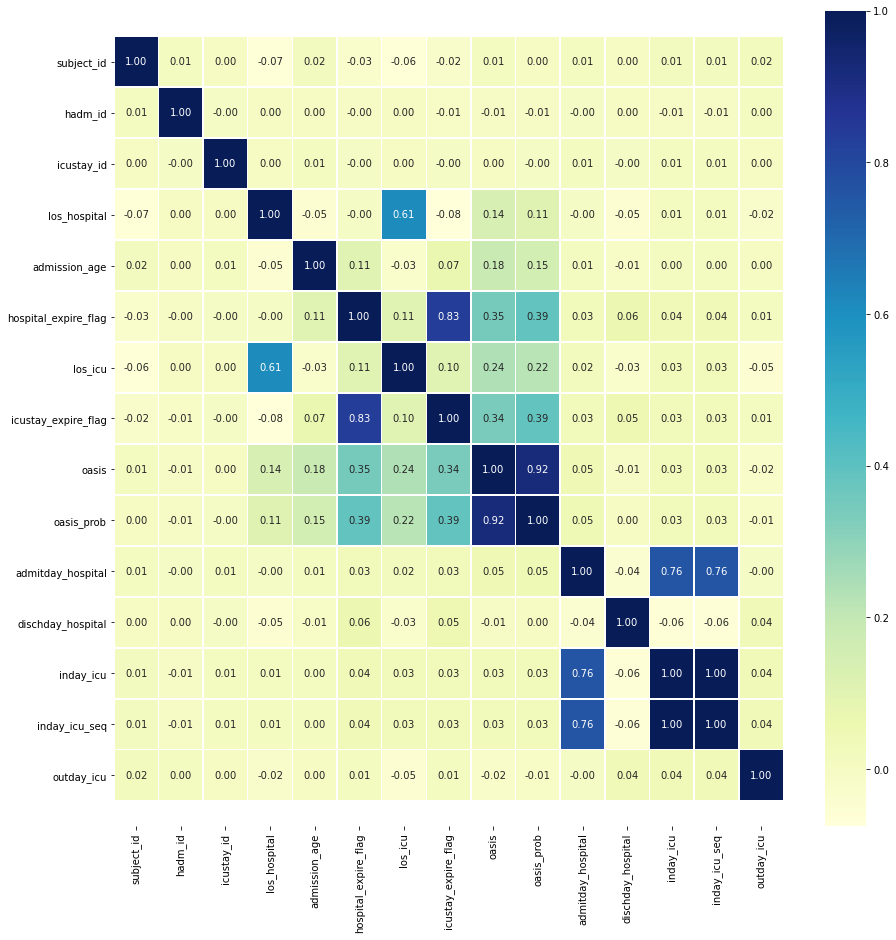

In [20]:
# Perform Correlation plot using correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

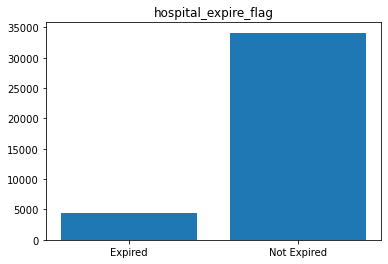

In [21]:
#Number of Expiries

fig, axs = plt.subplots(1,1)

axs.set_title("hospital_expire_flag")
TF = ["Expired","Not Expired"]
TF_count = [data['hospital_expire_flag'].value_counts()[1],data['hospital_expire_flag'].value_counts()[0]]
axs.bar(TF,TF_count)

plt.show()

In [22]:
# Expired
dataset_e = data[data.hospital_expire_flag==1]
# Not Expired
dataset_ne = data[data.hospital_expire_flag==0]

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Expiries based on day of the week w.r.t the day of admition')

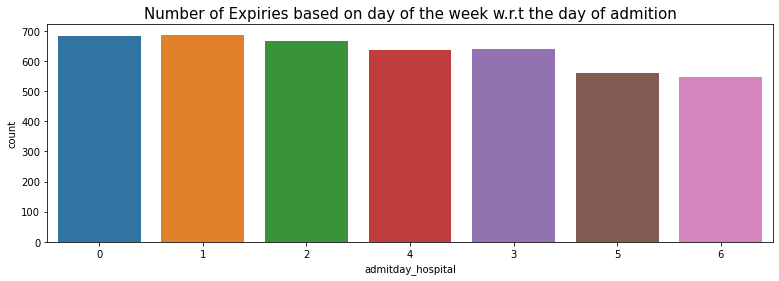

In [23]:
# Number of Expiries based on day of the week w.r.t the day of admition

plt.figure(figsize=(13, 4))
sns.countplot(dataset_e.admitday_hospital.dropna(), order = data.admitday_hospital.value_counts().index);
plt.title('Number of Expiries based on day of the week w.r.t the day of admition', fontsize = 15)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Non Expiries based on day of the week w.r.t the day of admition')

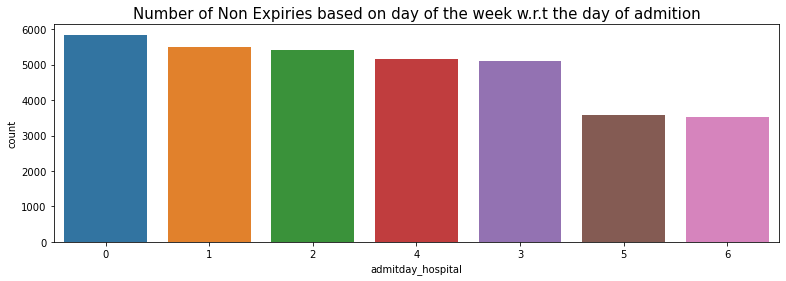

In [24]:
# Number of Non Expiries based on day of the week w.r.t the day of admition

plt.figure(figsize=(13, 4))
sns.countplot(dataset_ne.admitday_hospital.dropna(), order = data.admitday_hospital.value_counts().index);
plt.title('Number of Non Expiries based on day of the week w.r.t the day of admition', fontsize = 15)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Expiries based on day of the week w.r.t the day of discharge')

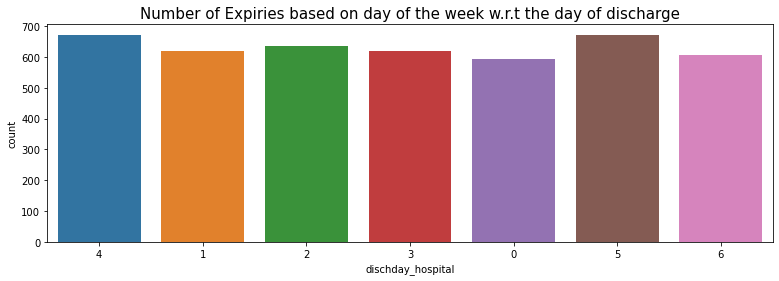

In [25]:
# Number of Expiries based on day of the week w.r.t the day of discharge

plt.figure(figsize=(13, 4))
sns.countplot(dataset_e.dischday_hospital.dropna(), order = data.dischday_hospital.value_counts().index);
plt.title('Number of Expiries based on day of the week w.r.t the day of discharge', fontsize = 15)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of non Expiries based on day of the week w.r.t the day of discharge')

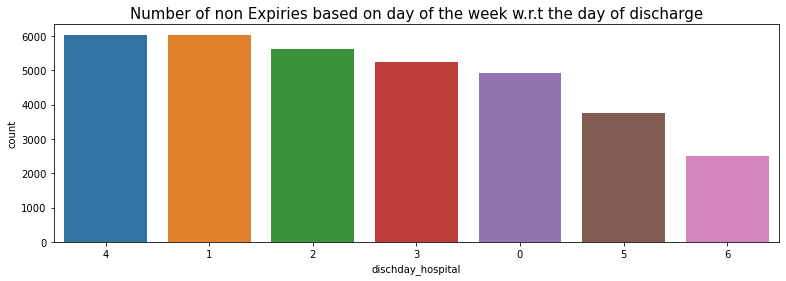

In [26]:
# Number of non Expiries based on day of the week w.r.t the day of discharge

plt.figure(figsize=(13, 4))
sns.countplot(dataset_ne.dischday_hospital.dropna(), order = data.dischday_hospital.value_counts().index);
plt.title('Number of non Expiries based on day of the week w.r.t the day of discharge', fontsize = 15)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Expiries')

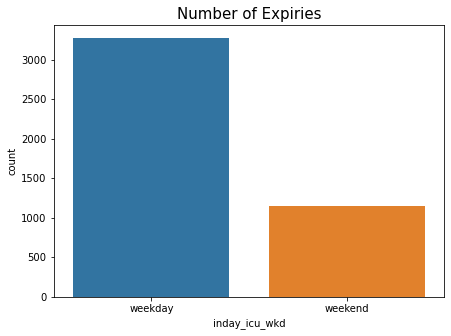

In [27]:
# patients who were expired

plt.figure(figsize=(7, 5))
sns.countplot(dataset_e.inday_icu_wkd.dropna(), order = data.inday_icu_wkd.value_counts().index);
plt.title('Number of Expiries', fontsize = 15)

C:\Users\tejas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of non Expiries')

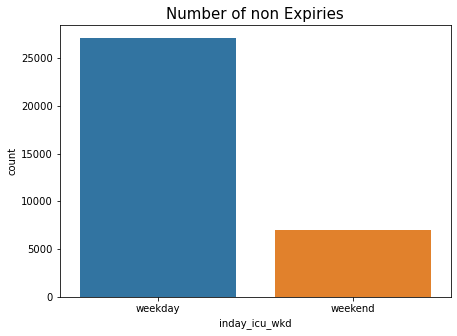

In [28]:
# patients who were not expired

plt.figure(figsize=(7, 5))
sns.countplot(dataset_ne.inday_icu_wkd.dropna(), order = data.inday_icu_wkd.value_counts().index);
plt.title('Number of non Expiries', fontsize = 15)

#### **From the above plots we can see that the target feature is imbalanced. Saturday and Sunday ( 0 and 6 in the plots ) represent the number of admits and discharges which are comparitively less when compared to weekdays. Hence, it makes sense that the number of expiries and non expiries are less during the weekends when compared to the weekday**

In [29]:
### dropping the columns that are highly correlated

data.drop(columns=['oasis_prob', 'inday_icu_seq'], inplace=True, axis=1)

In [30]:
data.head()

,subject_id,hadm_id,icustay_id,gender,admittime_hospital,dischtime_hospital,los_hospital,admission_age,ethnicity,hospital_expire_flag,...,los_icu,first_careunit,admission_type,icustay_expire_flag,oasis,admitday_hospital,dischday_hospital,inday_icu,outday_icu,inday_icu_wkd
0,3,145834,211552,M,2101-10-20 19:08:00,2101-10-31 13:58:00,11,76,WHITE,0,...,6.0,MICU,EMERGENCY,0,57,3,0,3,2,weekday
1,6,107064,228232,F,2175-05-30 07:15:00,2175-06-15 16:00:00,16,66,WHITE,0,...,4.0,SICU,ELECTIVE,0,11,1,3,1,5,weekday
2,56,181711,275642,F,2104-01-02 02:01:00,2104-01-08 10:30:00,6,300,WHITE,1,...,1.0,SICU,EMERGENCY,0,52,2,1,2,3,weekday
3,98,188606,216929,F,2137-04-02 08:00:00,2137-04-09 10:38:00,7,41,WHITE,0,...,2.0,SICU,ELECTIVE,0,11,1,1,1,3,weekday
4,136,184644,203947,M,2103-05-09 07:15:00,2103-05-14 11:33:00,5,52,WHITE,0,...,1.0,SICU,ELECTIVE,0,8,2,0,2,3,weekday


(13.5, -0.5)

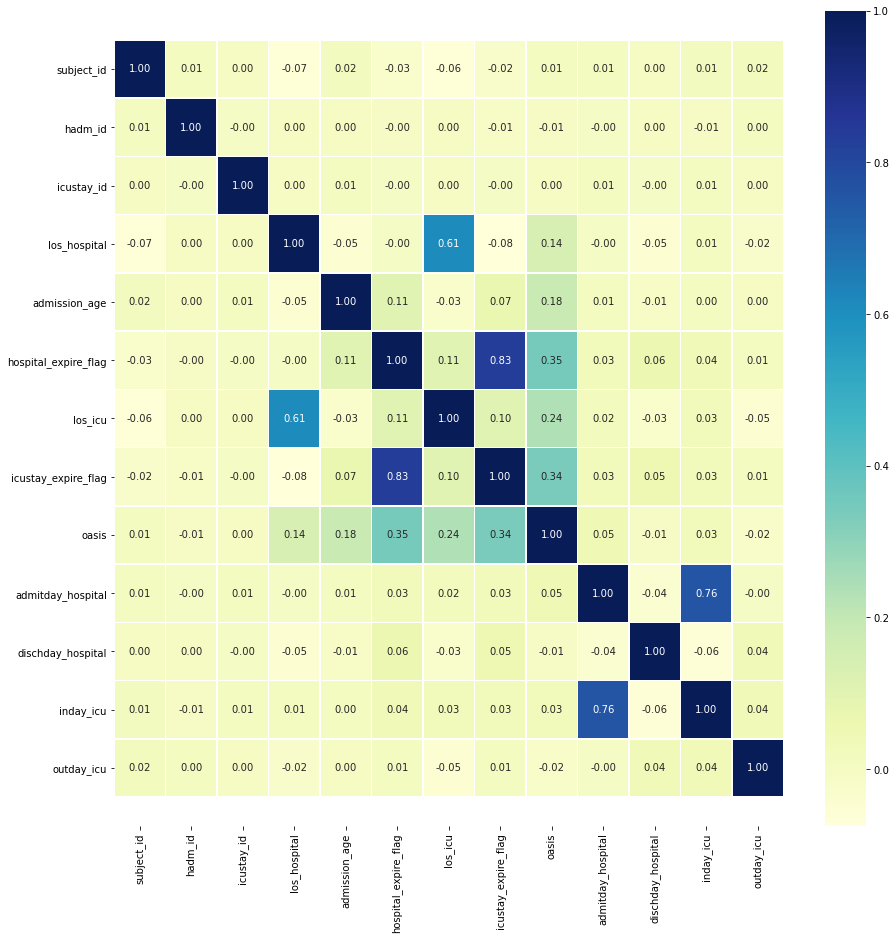

In [31]:
# Perform Correlation using correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Feature Engineering

In [32]:
# Unique etnicity

data['ethnicity'].unique()



array(['WHITE', 'OTHER', 'BLACK/AFRICAN AMERICAN',
       'UNKNOWN/NOT SPECIFIED', 'ASIAN', 'ASIAN - CAMBODIAN',
       'PATIENT DECLINED TO ANSWER', 'HISPANIC OR LATINO',
       'MULTI RACE ETHNICITY',
       'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'UNABLE TO OBTAIN',
       'BLACK/CAPE VERDEAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - BRAZILIAN', 'WHITE - RUSSIAN', 'ASIAN - CHINESE',
       'BLACK/AFRICAN', 'HISPANIC/LATINO - GUATEMALAN',
       'ASIAN - FILIPINO', 'CARIBBEAN ISLAND', 'HISPANIC/LATINO - CUBAN',
       'PORTUGUESE', 'ASIAN - VIETNAMESE', 'ASIAN - JAPANESE',
       'WHITE - OTHER EUROPEAN', 'WHITE - EASTERN EUROPEAN',
       'BLACK/HAITIAN', 'ASIAN - ASIAN INDIAN', 'MIDDLE EASTERN',
       'AMERICAN INDIAN/ALASKA NATIVE', 'HISPANIC/LATINO - SALVADORAN',
       'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - DOMINICAN',
       'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'ASIAN - OTHER',
       'HISPANIC/LATINO - MEXICAN', 'HISPANIC/LATINO - HONDURAN',

In [33]:
# selecting the top 10 etnicity for our model

data.ethnicity.value_counts().sort_values(ascending=False).head(20)

WHITE                             27270
UNKNOWN/NOT SPECIFIED              3725
BLACK/AFRICAN AMERICAN             2715
HISPANIC OR LATINO                  979
OTHER                               885
UNABLE TO OBTAIN                    754
ASIAN                               588
PATIENT DECLINED TO ANSWER          387
ASIAN - CHINESE                     184
HISPANIC/LATINO - PUERTO RICAN      139
BLACK/CAPE VERDEAN                  133
WHITE - RUSSIAN                     106
MULTI RACE ETHNICITY                 84
BLACK/HAITIAN                        69
WHITE - OTHER EUROPEAN               64
HISPANIC/LATINO - DOMINICAN          60
ASIAN - ASIAN INDIAN                 53
WHITE - BRAZILIAN                    39
ASIAN - VIETNAMESE                   35
PORTUGUESE                           34
Name: ethnicity, dtype: int64

In [34]:
# Lets make a list of the top 10 repeating category variables

top10 = [x for x in data.ethnicity.value_counts().sort_values(ascending=False).head(10).index]
top10

['WHITE',
 'UNKNOWN/NOT SPECIFIED',
 'BLACK/AFRICAN AMERICAN',
 'HISPANIC OR LATINO',
 'OTHER',
 'UNABLE TO OBTAIN',
 'ASIAN',
 'PATIENT DECLINED TO ANSWER',
 'ASIAN - CHINESE',
 'HISPANIC/LATINO - PUERTO RICAN']

In [35]:
# creating a function to apply this to all the features

def one_hot(data,feature,top_labels):
    for label in top_labels:
        data[feature+'_'+label] = np.where(data[feature]==label, 1, 0)

# perform 1 hot encoding for X1 feature
one_hot(data,'ethnicity',top10)
data.head(10)

,subject_id,hadm_id,icustay_id,gender,admittime_hospital,dischtime_hospital,los_hospital,admission_age,ethnicity,hospital_expire_flag,...,ethnicity_WHITE,ethnicity_UNKNOWN/NOT SPECIFIED,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_OTHER,ethnicity_UNABLE TO OBTAIN,ethnicity_ASIAN,ethnicity_PATIENT DECLINED TO ANSWER,ethnicity_ASIAN - CHINESE,ethnicity_HISPANIC/LATINO - PUERTO RICAN
0,3,145834,211552,M,2101-10-20 19:08:00,2101-10-31 13:58:00,11,76,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
1,6,107064,228232,F,2175-05-30 07:15:00,2175-06-15 16:00:00,16,66,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
2,56,181711,275642,F,2104-01-02 02:01:00,2104-01-08 10:30:00,6,300,WHITE,1,...,1,0,0,0,0,0,0,0,0,0
3,98,188606,216929,F,2137-04-02 08:00:00,2137-04-09 10:38:00,7,41,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
4,136,184644,203947,M,2103-05-09 07:15:00,2103-05-14 11:33:00,5,52,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
5,141,168006,234668,M,2140-11-06 11:07:00,2140-11-09 20:36:00,3,80,OTHER,1,...,0,0,0,0,1,0,0,0,0,0
6,166,128219,271863,F,2105-01-23 22:57:00,2105-01-24 03:48:00,1,300,WHITE,1,...,1,0,0,0,0,0,0,0,0,0
7,310,142159,269885,M,2139-05-06 13:15:00,2139-05-10 12:00:00,4,43,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
8,348,130789,259918,F,2154-12-13 12:30:00,2154-12-16 11:31:00,3,46,WHITE,0,...,1,0,0,0,0,0,0,0,0,0
9,412,109897,258588,M,2138-03-18 08:00:00,2138-03-25 17:20:00,7,76,BLACK/AFRICAN AMERICAN,0,...,0,0,1,0,0,0,0,0,0,0


In [36]:
# dropping the original feature after the one-hot-encodings are created
data.drop(columns='ethnicity', inplace=True, axis=1)

In [37]:
# Encoding the other categorical features that have only 2 categorical values for each feature 
categorical_features = ['admission_type', 'first_careunit', 'gender', 'inday_icu_wkd']

encoded_features = pd.get_dummies(data[categorical_features])

In [38]:
# concatinating the encoded dataframe with the original dataframe
data = pd.concat([data,encoded_features],axis=1)

In [39]:
# dropping the original categorical values after encoded
data.drop(columns=['first_careunit','admission_type','gender', 'inday_icu_wkd'], inplace=True)

In [40]:
data.head()

,subject_id,hadm_id,icustay_id,admittime_hospital,dischtime_hospital,los_hospital,admission_age,hospital_expire_flag,intime_icu,outtime_icu,...,admission_type_URGENT,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU,gender_F,gender_M,inday_icu_wkd_weekday,inday_icu_wkd_weekend
0,3,145834,211552,2101-10-20 19:08:00,2101-10-31 13:58:00,11,76,0,2101-10-20 19:10:11,2101-10-26 20:43:09,...,0,0,0,1,0,0,0,1,1,0
1,6,107064,228232,2175-05-30 07:15:00,2175-06-15 16:00:00,16,66,0,2175-05-30 21:30:54,2175-06-03 13:39:54,...,0,0,0,0,1,0,1,0,1,0
2,56,181711,275642,2104-01-02 02:01:00,2104-01-08 10:30:00,6,300,1,2104-01-02 02:02:39,2104-01-03 22:25:29,...,0,0,0,0,1,0,1,0,1,0
3,98,188606,216929,2137-04-02 08:00:00,2137-04-09 10:38:00,7,41,0,2137-04-02 15:15:39,2137-04-04 21:06:16,...,0,0,0,0,1,0,1,0,1,0
4,136,184644,203947,2103-05-09 07:15:00,2103-05-14 11:33:00,5,52,0,2103-05-09 18:17:36,2103-05-10 16:42:19,...,0,0,0,0,1,0,0,1,1,0


In [41]:
data.dtypes

subject_id                                           int64
hadm_id                                              int64
icustay_id                                           int64
admittime_hospital                          datetime64[ns]
dischtime_hospital                          datetime64[ns]
los_hospital                                         int64
admission_age                                        int64
hospital_expire_flag                                 int64
intime_icu                                  datetime64[ns]
outtime_icu                                 datetime64[ns]
los_icu                                            float64
icustay_expire_flag                                  int64
oasis                                                int64
admitday_hospital                                    int64
dischday_hospital                                    int64
inday_icu                                            int64
outday_icu                                           int

In [42]:
# dropping the datetime datatypes as we converted the datetime features to dayoftheweek features
datetime_cols = ['admittime_hospital', 'dischtime_hospital', 'intime_icu', 'outtime_icu']

data.drop(columns=datetime_cols, axis=1, inplace=True)

In [43]:
data.dtypes

subject_id                                    int64
hadm_id                                       int64
icustay_id                                    int64
los_hospital                                  int64
admission_age                                 int64
hospital_expire_flag                          int64
los_icu                                     float64
icustay_expire_flag                           int64
oasis                                         int64
admitday_hospital                             int64
dischday_hospital                             int64
inday_icu                                     int64
outday_icu                                    int64
ethnicity_WHITE                               int32
ethnicity_UNKNOWN/NOT SPECIFIED               int32
ethnicity_BLACK/AFRICAN AMERICAN              int32
ethnicity_HISPANIC OR LATINO                  int32
ethnicity_OTHER                               int32
ethnicity_UNABLE TO OBTAIN                    int32
ethnicity_AS

# Standardizing the dataset

In [44]:
# Scaling and splitting the data to train and test


# Scaler
scalar = StandardScaler()

# Identifying the class label
X = data.drop(columns=['hospital_expire_flag'])
y = data['hospital_expire_flag']


# Creating training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

# Center and normalize the data
scalar.fit(X)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

# Building Machine Learning models


 Naive Bayes 
 Accuracy: 0.9598506069094305 
 F-score 0.8105726872246695 
 Precision score 0.8922413793103449 
 Recall score 0.7426008968609865

 Logistic Regression 
 Accuracy: 0.9690839298682435 
 F-score 0.8460743801652894 
 Precision score 0.997563946406821 
 Recall score 0.7345291479820628

 K Nearest Neighbour 
 Accuracy: 0.9644153957879448 
 F-score 0.821074595722483 
 Precision score 0.9812967581047382 
 Recall score 0.705829596412556

 Support Vector Classification 
 Accuracy: 0.9689801846664592 
 F-score 0.8451579492490937 
 Precision score 1.0 
 Recall score 0.7318385650224215

 Decision Tree Classification 
 Accuracy: 0.9379603693329184 
 F-score 0.7395470383275262 
 Precision score 0.7188823031329382 
 Recall score 0.7614349775784753

 Stochastic Gradient Descent 
 Accuracy: 0.9690839298682435 
 F-score 0.8457556935817806 
 Precision score 1.0 
 Recall score 0.7327354260089686

 Linear Discriminant Analysis 
 Accuracy: 0.969187675070028 
 F-score 0.8463528194516295 
 Prec

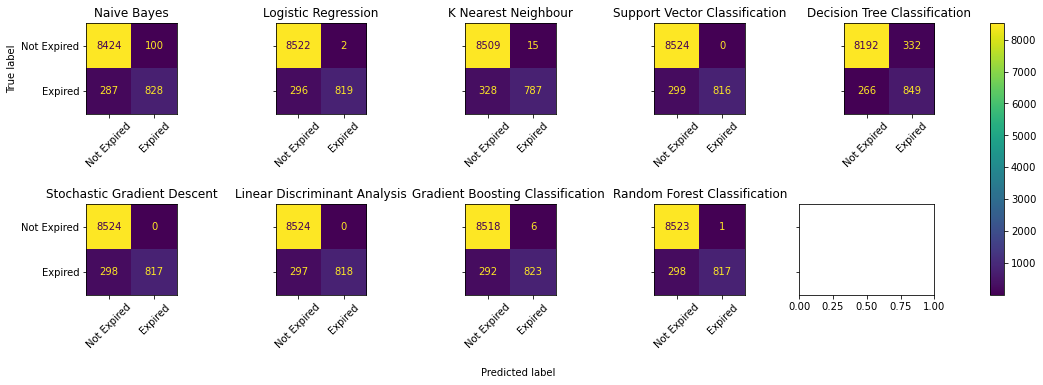

In [45]:
# building classifiers for training and testing different models

classifiers = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "K Nearest Neighbour": KNeighborsClassifier(),
    "Support Vector Classification": SVC(),
    "Decision Tree Classification": DecisionTreeClassifier(),
    "Stochastic Gradient Descent": SGDClassifier(),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Gradient Boosting Classification ": GradientBoostingClassifier(),
    "Random Forest Classification": RandomForestClassifier()
    }

f, axes = plt.subplots(2, 5, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    j = 0
    k = i
    if i>4:
        k = i-5
        j+=1
    
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print("\n" ,key, "\n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred), 
          "\n Precision score",precision_score(y_test,y_pred), "\n Recall score", recall_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Expired","Expired"])
    disp.plot(ax=axes[j][k], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.43, -0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=1)


f.colorbar(disp.im_, ax=axes)
plt.show()

# Hyperparameter Tuning

### Gradient Boosting

In [ ]:
# Gradient Boosting

parameters = [{
    "loss":["deviance"],
    "learning_rate": [0.2,0.3,0.4],
    "min_samples_split": [0.01,0.1, 0.5],
    "min_samples_leaf": [0.0001,0.001, 0.01],
    "max_depth":[8,10,15],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.7,0.8,0.9],
    "n_estimators":[10,20,30]
    }]
gbm = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, n_jobs=-1,scoring='f1', verbose=True)
gbm.fit(X_train,y_train)

Fitting 5 folds for each of 2916 candidates, totalling 14580 fits


In [ ]:
print(gbm.best_params_)


In [ ]:
# Gradient boosting with best parameters
gs_gbm = GradientBoostingClassifier( 
    criterion='friedman_mse',
    learning_rate=0.2,
    loss='deviance',
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf= 0.0001,
    min_samples_split= 0.1,
    n_estimators = 30,
    subsample = 0.7
)
gs_gbm.fit(X_train, y_train)
gs_gbm.score(X_test,y_test)

### Stochastic gradient descent

In [ ]:
parameters = [{
    "max_iter": [100,200,300],
    "loss": ["hinge","log","squared_hinge","perceptron"],
    "penalty": ["elasticnet", "l1", "l2"],
    "alpha": [0.0001, 0.001, 0.01, 0.1], 
    "learning_rate": ['constant', 'optimal', 'invscaling', 'adaptive'],
    "class_weight": [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
    "eta0": [1, 10] 
             }]
sgd = GridSearchCV(SGDClassifier(), parameters, cv=5, n_jobs=-1,scoring='f1', verbose=True)
sgd.fit(X_train,y_train)

In [ ]:
print(sgd.best_params_)


In [ ]:
# Stochastic gradient descent with best parameters
gs_sgd = SGDClassifier(alpha =0.001, 
                       class_weight ={1: 0.7, 0: 0.3}, 
                       eta0 =10, 
                       learning_rate = 'adaptive', 
                       loss= 'perceptron', 
                       max_iter=300, 
                       penalty= 'elasticnet')
gs_sgd.fit(X_train, y_train)
gs_sgd.score(X_test,y_test)

### Random Forest

In [ ]:
parameters = [{
    "criterion": ["gini",  "entropy"],
    "n_estimators": [200,400,600,800,1000],
    "max_features": ['auto', 'sqrt'],
    "max_depth": [5, 50, 100],
    "min_samples_split": [5,10,15,20,25,30], 
    "min_samples_leaf": [1,5,10,15,20],
    "bootstrap": [True, False]
             }]

rf = GridSearchCV(RandomForestClassifier(), 
                  parameters, 
                  cv=5, 
                  n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

rf.fit(X_train,y_train)

In [ ]:
print(rf.best_params_)

In [ ]:
# Random forest with best parameters
gs_rf = RandomForestClassifier(bootstrap=False,
                               criterion='entropy',
                               max_depth= 100, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=25, 
                               n_estimators=800)
gs_rf.fit(X_train, y_train)
gs_rf.score(X_test,y_test)

### Decision tree

In [ ]:
parameters = [{
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(1,10), 
    "min_samples_leaf": [1,2,5,10],
             }]

dt = GridSearchCV(DecisionTreeClassifier(),
                  parameters, 
                  cv=5, n_jobs=-1,
                  scoring='f1', 
                  verbose=True)

dt.fit(X_train,y_train)

In [ ]:
print(dt.best_params_)


In [ ]:
# Decision Tree with best parameters
gs_dt = DecisionTreeClassifier(criterion='gini', 
                               max_depth= 6, 
                               min_samples_leaf=1, 
                               min_samples_split=2,)
gs_dt.fit(X_train, y_train)
gs_dt.score(X_test,y_test)

# Ensemble technique to build the model

In [ ]:
classifiers = {
    "Gradient Boosting": gs_gbm,
    "Stochastic Gradient Descent": gs_sgd,
    "Random Forest": gs_rf,
    "Decision Tree": gs_dt
}

f, axes = plt.subplots(1, 4, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    print("\n",key, " \n Accuracy:",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))
    disp = ConfusionMatrixDisplay(cf_matrix,
                                  display_labels=["Not Purchased","Purchased"])
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()

In [ ]:
### combining the best performing models by ensemble voting technique

In [ ]:
# Combination of the three best models
estimators=[('Random Forest',gs_rf),('Decision Tree',gs_dt),('Stochastic Gradient Descent',gs_sgd)]
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)
y_pred = ensemble.fit(X_train, y_train).predict(X_test)
print(" Accuracy : ",accuracy_score(y_test,y_pred),"\n F-score",f1_score(y_test,y_pred))

# Exporting the model files

In [ ]:
# combined model
pickle.dump(ensemble, open('Flask_restful_api/model.pickle', 'wb'))

# scaled df of X train and test
pickle.dump(scalar, open('Flask_restful_api/scaler.pickle','wb'))
